In [23]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tifffile
from scipy import signal
from scipy import ndimage

import sys; sys.path.append(str(Path("../../")))
import pykappa

data_dir = Path("/home/hadim/.data/Postdoc/Kappa/spiral_curve_v2")
data_dir.mkdir(exist_ok=True)

# We use a small pixel size for the 
# original image that will be used 
# to build all the different dataset.
original_pixel_size = 0.01  # um

offset = 80  # pixel

signal_value = 100

initial_radius = 5  # um
spiral_length = 9  # um
spiral_step_size = 0.001  # um

fixed_snr = 20  # dB
fixed_pixel_size = 0.16  # um/pixel

In [36]:
# Golden ratio
phi = (1 + np.sqrt(5)) / 2

# Initial radius
a = initial_radius

# Growth factor
b = np.log(phi) / np.deg2rad(90)

# Define spiral length
t = np.arange(0, spiral_length, spiral_step_size)

# `t` is scaled to get even spacing between computed points.
t = np.log(b * t) / b

# We remove the first data points that are too curved.
# See https://computergraphics.stackexchange.com/questions/5735/logarithmic-spiral-with-equal-vertex-spacing-what-equations
t = t[400:]

# Compute curvatures
kappa = (np.exp(-1 * b * t)) / (a * np.sqrt(1 + b**2))

# Compute arc length
t0 = 0
l = (np.sqrt(a**2 * (b**2 + 1)) * (np.sqrt(np.exp(2*b*t)) - (np.sqrt(np.exp(2*b*t0))))) / b

# Compute positions
xx = a * np.exp(b * t) * np.cos(t)
yy = a * np.exp(b * t) * np.sin(t)

origin = np.array([xx.min(), yy.min()])
xx -= xx.min()
yy -= yy.min()

pixel_size = 0.16
step = 100

xx /= pixel_size
yy /= pixel_size

xx += offset * pixel_size
yy += offset * pixel_size

xx = xx[::step]
yy = yy[::step]

/home/hadim/local/conda/envs/ws/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


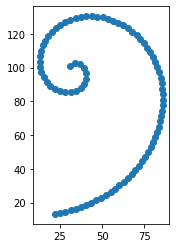

In [37]:
fig, ax = plt.subplots()
ax.scatter(yy, xx)
ax.set_aspect('equal')

In [38]:
pixel_size = 0.16

curve_data = {}
curve_data['curveType'] = 1
curve_data['noKeyframes'] = 1
curve_data['noCtrlPts'] = len(xx)
curve_data['bsplineType'] = 0
curve_data['curve_pos'] = np.array([yy, xx]).T
pykappa.io.write_kappa([curve_data], '/home/hadim/snr_20_dB_TEST.kapp')